### Import things

In [44]:
# Numerical
import numpy as np
import pandas as pd
from scipy import stats 


# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler




# Metrics
from sklearn.metrics import r2_score


# Tools
import csv
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


# Regression models
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


# Audio notificaions
from IPython.display import Audio
sound_file = '/System/Library/Sounds/Hero.aiff'

## 2.1 NYC Airbnb listing price regression


### 1) Loading data 

In [45]:
directory = "NYC_Airbnb/"

train_df = pd.read_csv(directory + 'development.csv')
test_df = pd.read_csv(directory + 'evaluation.csv')
test_id = test_df['id']

train_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12783632,NYC Mini Hotel,57230304,Imanuelly,Queens,Elmhurst,40.74037,-73.88610,Private room,75,1,2,2019-05-26,0.92,3,351
1,3463385,Gorgeous room in Manhattan,10698270,Evgenia,Manhattan,Upper East Side,40.76717,-73.95532,Private room,95,1,202,2019-05-27,3.31,2,263
2,17572926,Great 1 Bedroom on Upper East,36578169,James,Manhattan,Upper East Side,40.77984,-73.94725,Entire home/apt,130,2,0,NaN,NaN,1,0
3,33913644,"Modern and bright 2Bed 2Bath Bushwick, Brooklyn",50981314,Ofier,Brooklyn,Bushwick,40.70205,-73.91338,Entire home/apt,150,2,4,2019-07-07,1.64,1,89
4,9405895,Stylish and zen Brooklyn retreat,48775347,Mathieu,Brooklyn,Fort Greene,40.68914,-73.97853,Entire home/apt,325,3,16,2019-04-20,0.42,1,103


In [46]:
train_df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911600e+04,39103,3.911600e+04,39097,39116,39116,39116.000000,39116.000000,39116,39116.000000,39116.000000,39116.000000,31075,31075.000000,39116.000000,39116.000000
unique,NaN,38438,NaN,10007,5,221,NaN,NaN,3,NaN,NaN,NaN,1718,NaN,NaN,NaN
top,NaN,Home away from home,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,15,NaN,331,17360,3121,NaN,NaN,20417,NaN,NaN,NaN,1125,NaN,NaN,NaN
mean,1.901070e+07,NaN,6.753109e+07,NaN,NaN,NaN,40.729037,-73.952308,NaN,153.406995,7.053073,23.261658,NaN,1.376466,7.204827,112.957613
std,1.100872e+07,NaN,7.863542e+07,NaN,NaN,NaN,0.054373,0.045880,NaN,242.218222,20.494289,44.601529,NaN,1.683171,33.109702,131.576326
min,2.595000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.507080,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.413194e+06,NaN,7.824647e+06,NaN,NaN,NaN,40.690260,-73.983160,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.969114e+07,NaN,3.059726e+07,NaN,NaN,NaN,40.723240,-73.955700,NaN,108.000000,3.000000,5.000000,NaN,0.720000,1.000000,46.000000
75%,2.917843e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763130,-73.936530,NaN,178.000000,5.000000,23.000000,NaN,2.020000,2.000000,226.000000


### Check features with null values

In [47]:
train_df.isnull().sum()

id                                   0
name                                13
host_id                              0
host_name                           19
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       8041
reviews_per_month                 8041
calculated_host_listings_count       0
availability_365                     0
dtype: int64

### Remove features with null values


In [48]:
train_df = train_df.drop(columns=['name', 'host_name', 'last_review', 'reviews_per_month'])
train_df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,12783632,57230304,Queens,Elmhurst,40.74037,-73.88610,Private room,75,1,2,3,351
1,3463385,10698270,Manhattan,Upper East Side,40.76717,-73.95532,Private room,95,1,202,2,263
2,17572926,36578169,Manhattan,Upper East Side,40.77984,-73.94725,Entire home/apt,130,2,0,1,0
3,33913644,50981314,Brooklyn,Bushwick,40.70205,-73.91338,Entire home/apt,150,2,4,1,89
4,9405895,48775347,Brooklyn,Fort Greene,40.68914,-73.97853,Entire home/apt,325,3,16,1,103


### Remove features without information

In [49]:
# train_df = train_df.drop(columns=['id', 'host_id', 'minimum_nights', 'calculated_host_listings_count', 'availability_365'])
train_df = train_df.drop(columns=['id', 'host_id'])
train_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Queens,Elmhurst,40.74037,-73.88610,Private room,75,1,2,3,351
1,Manhattan,Upper East Side,40.76717,-73.95532,Private room,95,1,202,2,263
2,Manhattan,Upper East Side,40.77984,-73.94725,Entire home/apt,130,2,0,1,0
3,Brooklyn,Bushwick,40.70205,-73.91338,Entire home/apt,150,2,4,1,89
4,Brooklyn,Fort Greene,40.68914,-73.97853,Entire home/apt,325,3,16,1,103


### 2) Data exploration

### Price distribution
Perform *box-cox* transformation. To do so, add 1 to the the *price* value when it's *0*, so the *log* will be 0, otherwise just add 1 to the *pric*e series.

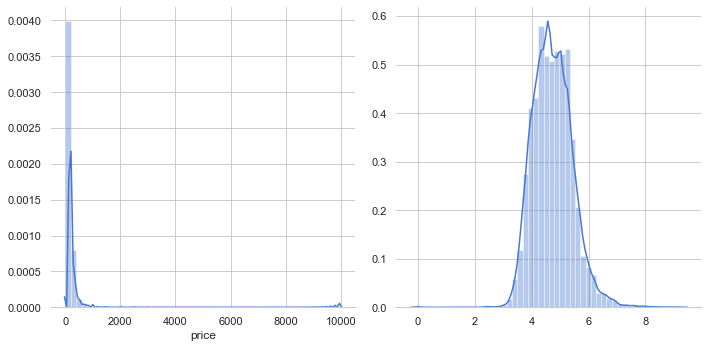

In [50]:
# Box-cox transform
# train_df.loc[(train_df['price'] == 0), 'price'] = 1
new_price = stats.boxcox(train_df['price']+1, 0)


sns.set(style="whitegrid", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
sns.despine(left=True)

# Plot a simple histogram of the price distribution with binsize determined automatically
sns.distplot(train_df['price'], kde=True, color="b", ax= axes[0])

# Plot a simple histogram of the tranformed price distribution with binsize determined automatically
sns.distplot(new_price, kde=True, color="b", ax= axes[1])

# plt.setp(axes, yticks=[])
plt.tight_layout()

### Printing some categorical values

In [16]:
print(f"Neighbourhood_group:\n{train_df['neighbourhood_group'].unique()}")
print()
print(f"Room types:\n{train_df['room_type'].unique()}")
print()
print(f"Neighbourhood of Queens:\n{train_df.loc[train_df['neighbourhood_group'] == 'Queens','neighbourhood'].unique()}")
print()
print(f"Neighbourhood of Manhattan:\n{train_df.loc[train_df['neighbourhood_group'] == 'Manhattan','neighbourhood'].unique()}")
print()
print(f"Neighbourhood of Brooklyn:\n{train_df.loc[train_df['neighbourhood_group'] == 'Brooklyn','neighbourhood'].unique()}")
print()
print(f"Neighbourhood of Bronx:\n{train_df.loc[train_df['neighbourhood_group'] == 'Bronx','neighbourhood'].unique()}")
print()
print(f"Neighbourhood of Staten Island:\n{train_df.loc[train_df['neighbourhood_group'] == 'Staten Island','neighbourhood'].unique()}")



Neighbourhood_group:
['Queens' 'Manhattan' 'Brooklyn' 'Bronx' 'Staten Island']

Room types:
['Private room' 'Entire home/apt' 'Shared room']

Neighbourhood of Queens:
['Elmhurst' 'Richmond Hill' 'Flushing' 'Ditmars Steinway' 'Ridgewood'
 'Astoria' 'Sunnyside' 'Cambria Heights' 'Long Island City'
 'East Elmhurst' 'Jackson Heights' 'Kew Gardens' 'Arverne'
 'Rockaway Beach' 'Woodhaven' 'South Ozone Park' 'Ozone Park' 'Woodside'
 'Jamaica' 'Queens Village' 'Briarwood' 'Maspeth' 'Jamaica Estates'
 'Douglaston' 'Forest Hills' 'Corona' 'Fresh Meadows' 'Rego Park'
 'Howard Beach' 'Middle Village' 'College Point' 'Rosedale' 'Glendale'
 'Springfield Gardens' 'Far Rockaway' 'St. Albans' 'Laurelton' 'Edgemere'
 'Bayswater' 'Bellerose' 'Kew Gardens Hills' 'Jamaica Hills' 'Bayside'
 'Bay Terrace' 'Belle Harbor' 'Whitestone' 'Holliswood' 'Hollis'
 'Breezy Point' 'Little Neck' 'Neponsit']

Neighbourhood of Manhattan:
['Upper East Side' 'Greenwich Village' 'Washington Heights' 'East Village'
 'East Har

### Some graphs on the relationship between attributes and price
(with the new box-cox transformed price)

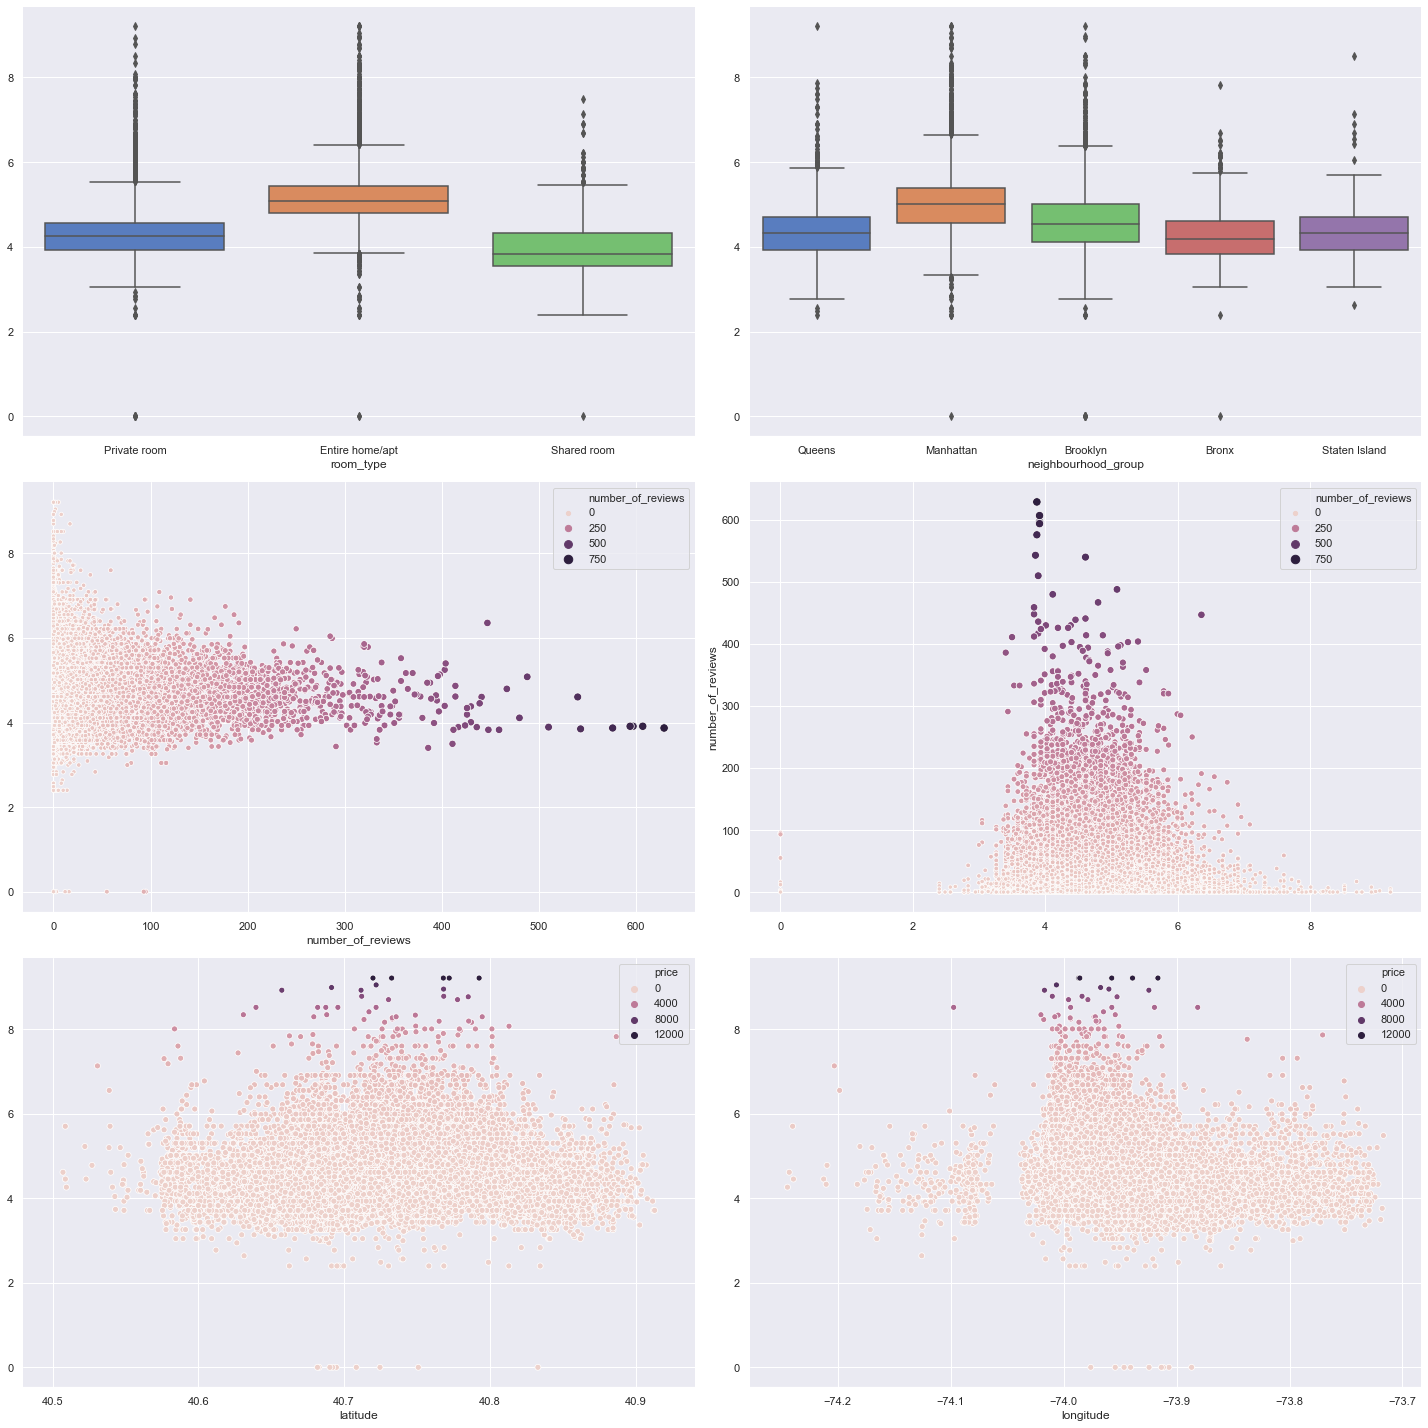

In [17]:
sns.set(style="darkgrid", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 2, figsize=(20, 20))
sns.despine(left=True)

# ax = axes.flatten()

# for a in ax:
#     a.yaxis.grid(True)

# Plot a boxplot comparing the room type to the price
sns.boxplot(x='room_type', y=new_price, data=train_df, ax=axes[0, 0])

# Plot a boxplot comparing the neighbourhood_group to the price
sns.boxplot(x='neighbourhood_group', y=new_price, data=train_df, ax=axes[0, 1])

# Plot a scatter plot comparing the number_of_reviews to the price
sns.scatterplot(x="number_of_reviews", y=new_price, data=train_df, size="number_of_reviews", hue="number_of_reviews", ax=axes[1,0])

# As before but upside down
sns.scatterplot(x=new_price, y="number_of_reviews", data=train_df, size="number_of_reviews", hue="number_of_reviews", ax=axes[1,1])

# Plot a scatter plot comparing the latitude to the price
sns.scatterplot(x="latitude", y=new_price, data=train_df, hue="price", ax=axes[2,0])

# Plot a scatter plot comparing the longitude to the price
sns.scatterplot(x="longitude", y=new_price, data=train_df, hue="price", ax=axes[2,1])


# plt.setp(axes, yticks=[])
plt.tight_layout()

#### More graphs but on every  *neighbourhood_group*

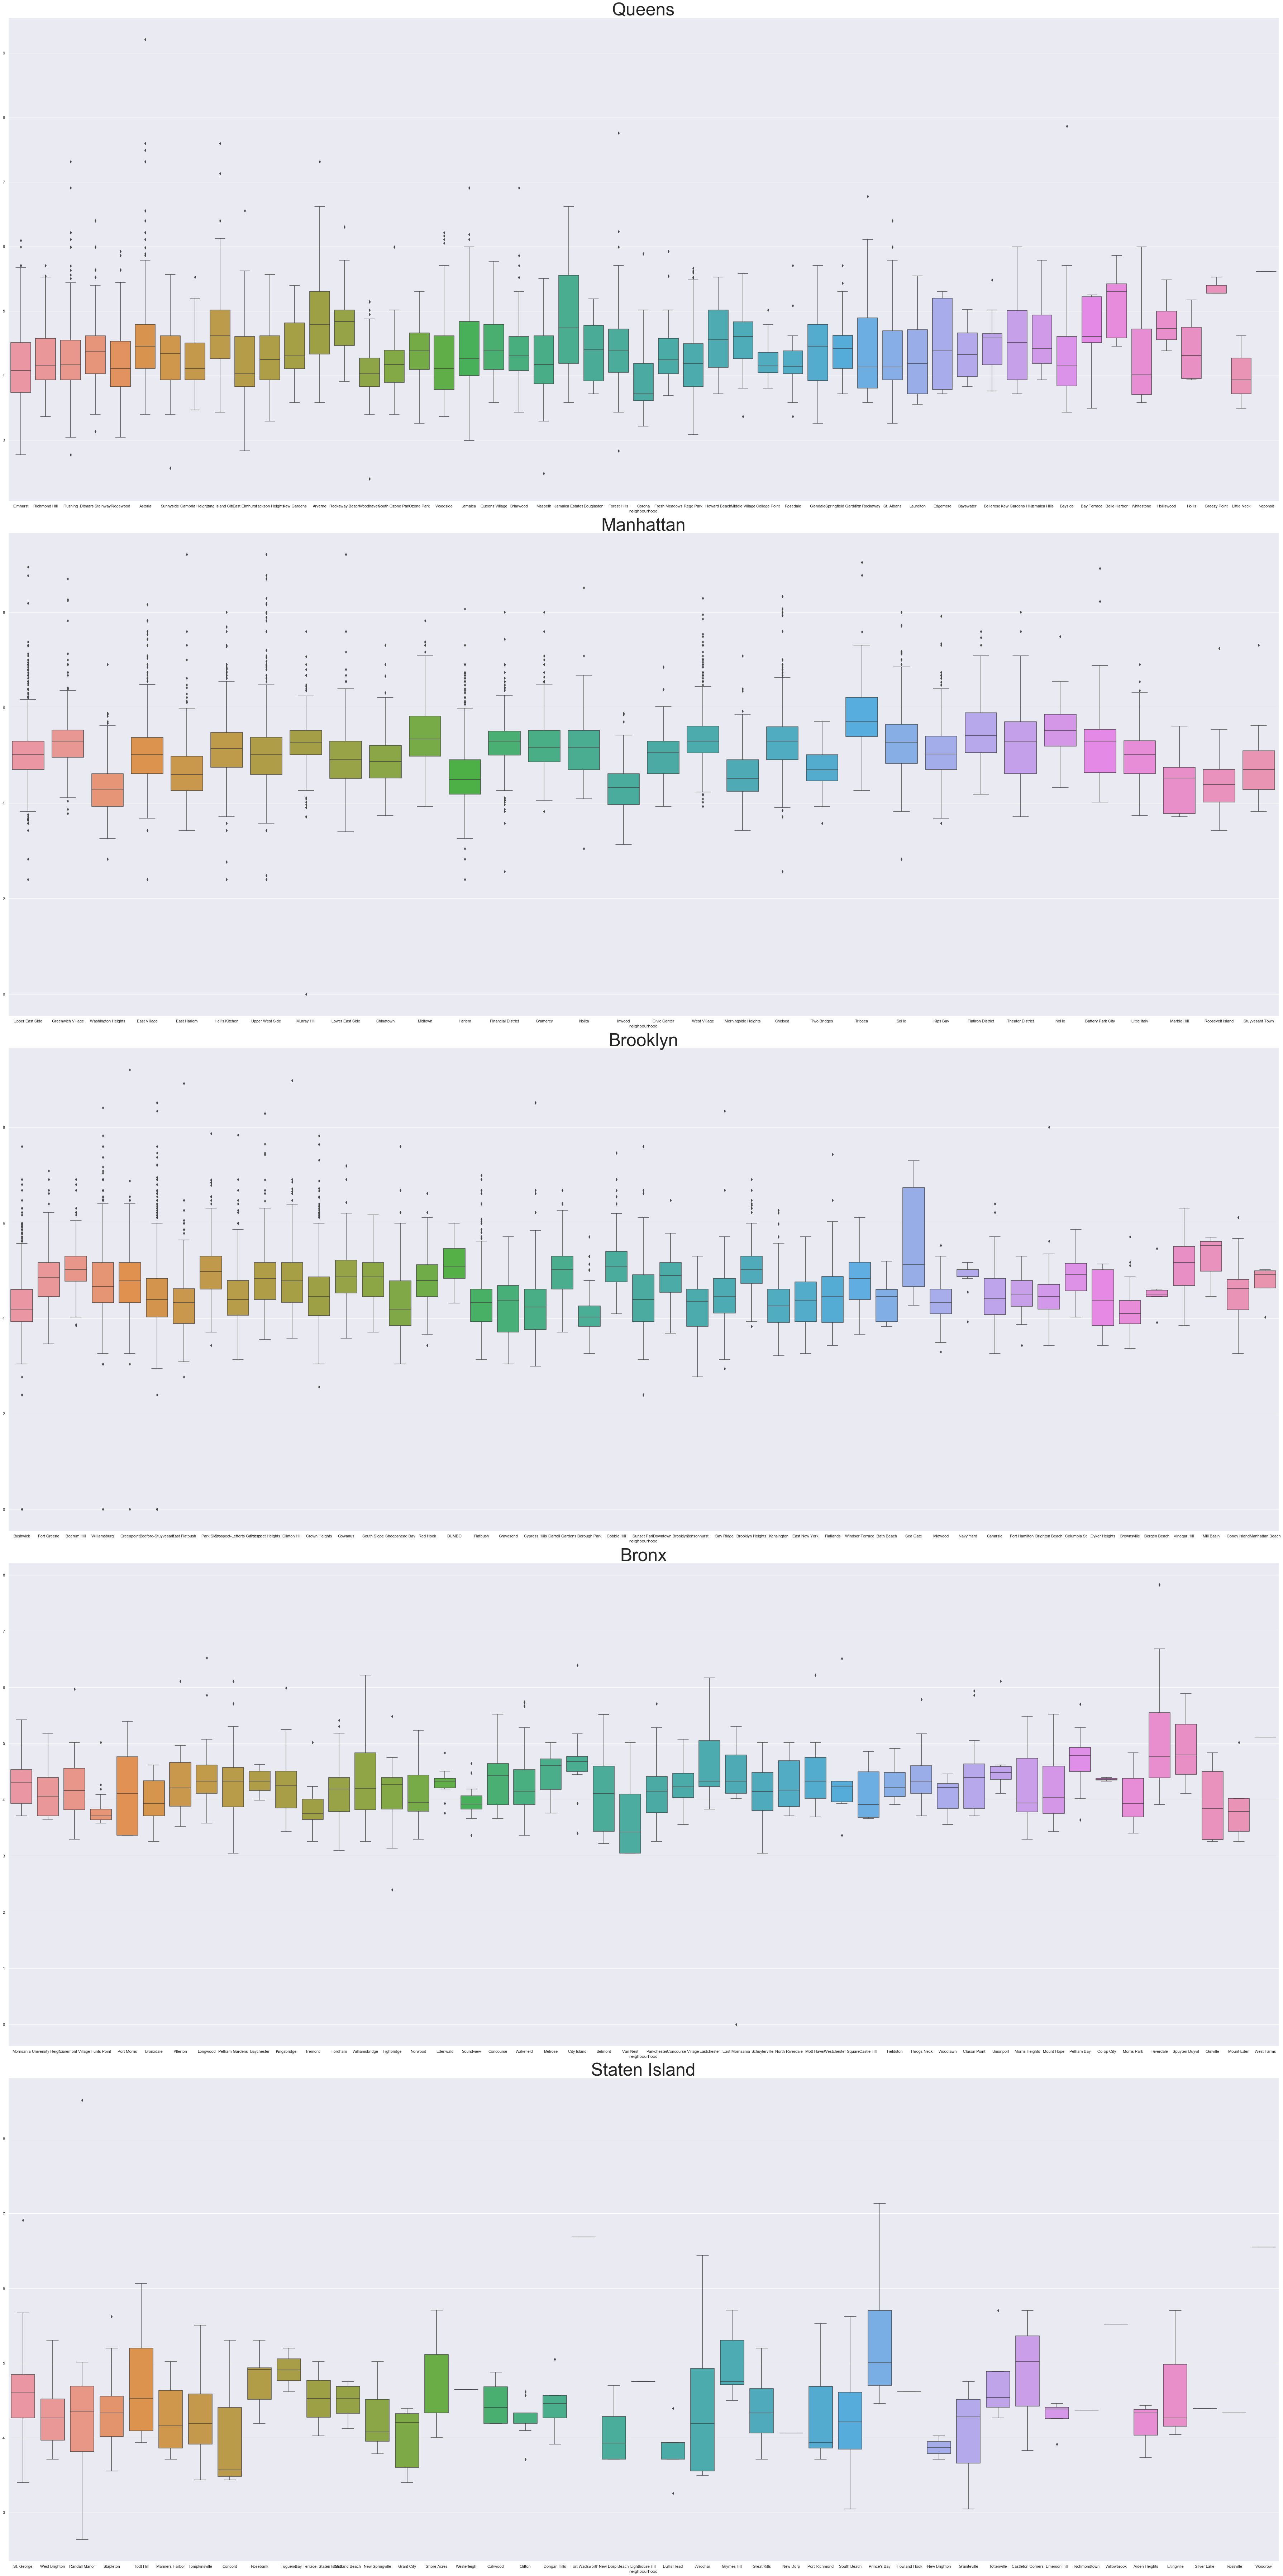

In [18]:
sns.set(style="darkgrid", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(5, 1, figsize=(50, 100))


# Plot a boxplot comparing neighbourhood to the price of Queens
a=sns.boxplot(x='neighbourhood', y=new_price, data=train_df.loc[(train_df['neighbourhood_group'] == 'Queens'), :], ax=axes[0])
a.set_title('Queens', fontsize=50)

# Plot a boxplot comparing neighbourhood to the price of Manhattan
b=sns.boxplot(x='neighbourhood', y=new_price, data=train_df.loc[(train_df['neighbourhood_group'] == 'Manhattan'), :], ax=axes[1])
b.set_title('Manhattan', fontsize=50)

# Plot a boxplot comparing neighbourhood to the price of Brooklyn
c=sns.boxplot(x='neighbourhood', y=new_price, data=train_df.loc[(train_df['neighbourhood_group'] == 'Brooklyn'), :], ax=axes[2])
c.set_title('Brooklyn', fontsize=50)

# Plot a boxplot comparing neighbourhood to the price of Bronx
d=sns.boxplot(x='neighbourhood', y=new_price, data=train_df.loc[(train_df['neighbourhood_group'] == 'Bronx'), :], ax=axes[3])
d.set_title('Bronx', fontsize=50)

# Plot a boxplot comparing neighbourhood to the price of Staten Island
e=sns.boxplot(x='neighbourhood', y=new_price, data=train_df.loc[(train_df['neighbourhood_group'] == 'Staten Island'), :], ax=axes[4])
e.set_title('Staten Island', fontsize=50)


# plt.setp(axes, yticks=[])
plt.tight_layout()

### Feature Selection

In [105]:
# Remember that new_price is the box-cox transformed price,
# the value of 1 was added to each price to eliminate 0 values (before computing the box-cox).
# Lambda is set to 0 so new_price = log(price+1)
train_df['log_price'] = new_price

# Q3 = train_df['room_type'].quantile(0.75)
# Q1 = train_df.quantile(0.25)
# IQR = Q3 - Q1

train_df_cleaned = train_df.loc[((train_df['room_type'] == "Private room") & (train_df['log_price'] > 3.1) & (train_df['log_price'] < 5.3)) |
                                 ((train_df['room_type'] == "Entire home/apt") & (train_df['log_price'] > 3.9) & (train_df['log_price'] < 6.3)) |
                                 ((train_df['room_type'] == "Shared room") & (train_df['log_price'] > 2.5) & (train_df['log_price'] < 5.3)), :]

train_df_cleaned = train_df_cleaned.loc[((train_df_cleaned['neighbourhood_group'] == "Queens") & (train_df_cleaned['log_price'] > 2.8) & (train_df_cleaned['log_price'] < 5.8)) |
                                 ((train_df_cleaned['neighbourhood_group'] == "Manhattan") & (train_df_cleaned['log_price'] > 3.4) & (train_df_cleaned['log_price'] < 6.5)) |
                                 ((train_df_cleaned['neighbourhood_group'] == "Brooklyn") & (train_df_cleaned['log_price'] > 2.7) & (train_df_cleaned['log_price'] < 6.3)) |
                                 ((train_df_cleaned['neighbourhood_group'] == "Bronx") & (train_df_cleaned['log_price'] > 3) & (train_df_cleaned['log_price'] < 5.7)) |
                                 ((train_df_cleaned['neighbourhood_group'] == "Staten Island") & (train_df_cleaned['log_price'] > 3) & (train_df_cleaned['log_price'] < 6)), :]




# train_df_cleaned = train_df_cleaned.loc[(train_df_cleaned['number_of_reviews'] > 3) & (train_df_cleaned['number_of_reviews'] < 6.5), :]

# train_df_cleaned = train_df_cleaned.loc[(train_df_cleaned['number_of_reviews'] > 0) , :]

train_df_cleaned.head()

# sns.set(style="darkgrid", palette="muted", color_codes=True)

# # Set up the matplotlib figure
# f, axes = plt.subplots(figsize=(20, 20))
# sns.despine(left=True)

# # Plot a boxplot comparing the room type to the price
# sns.boxplot(x='neighbourhood_group', y=new_price, data=train_df_cleaned)

# # plt.setp(axes, yticks=[])
# plt.tight_layout()


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,log_price
0,Queens,Elmhurst,40.74037,-73.88610,Private room,75,1,2,3,351,4.330733
1,Manhattan,Upper East Side,40.76717,-73.95532,Private room,95,1,202,2,263,4.564348
2,Manhattan,Upper East Side,40.77984,-73.94725,Entire home/apt,130,2,0,1,0,4.875197
3,Brooklyn,Bushwick,40.70205,-73.91338,Entire home/apt,150,2,4,1,89,5.017280
4,Brooklyn,Fort Greene,40.68914,-73.97853,Entire home/apt,325,3,16,1,103,5.786897


In [106]:
# sns.set(style="darkgrid", palette="muted", color_codes=True)

# # Set up the matplotlib figure
# f, axes = plt.subplots(figsize=(20, 20))
# sns.despine(left=True)

# # As before but upside down
# sns.scatterplot(x='log_price', y="number_of_reviews", data=train_df_cleaned, size="number_of_reviews", hue="number_of_reviews")


# # plt.setp(axes, yticks=[])
# plt.tight_layout()

### 3) Regression

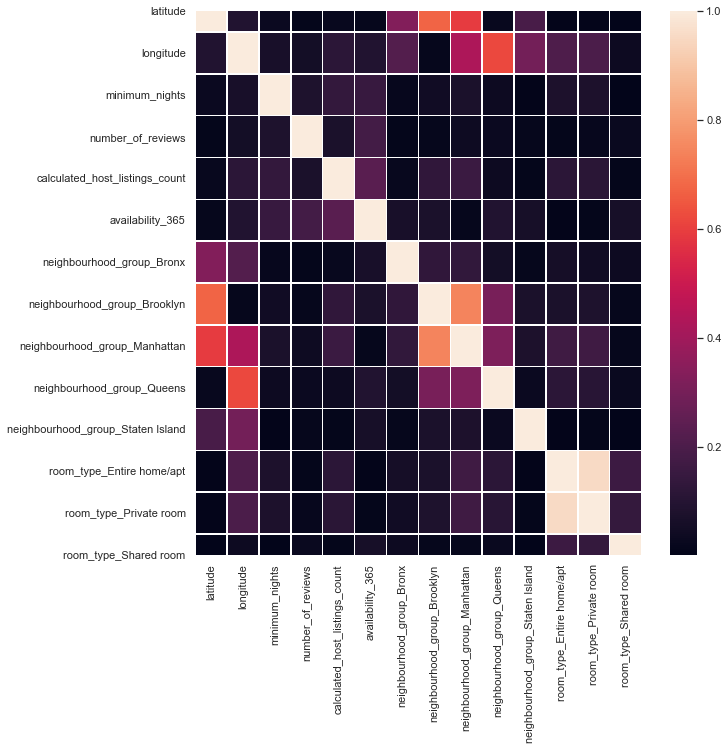

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
latitude,1.000000,0.087316,0.030132,-0.011290,0.021402,-0.014999,0.330177,-0.675755,0.593075,0.021976,-0.189257,-0.006602,0.006246,0.001255
longitude,0.087316,1.000000,-0.064844,0.052894,-0.117941,0.089921,0.219616,0.015325,-0.429828,0.618655,-0.294100,-0.206882,0.197638,0.032961
minimum_nights,0.030132,-0.064844,1.000000,-0.081674,0.135662,0.149026,-0.019476,-0.045284,0.073962,-0.033656,-0.007443,0.078180,-0.077949,-0.001580
number_of_reviews,-0.011290,0.052894,-0.081674,1.000000,-0.074144,0.180245,0.009396,0.014991,-0.040091,0.030911,0.013473,-0.012454,0.020598,-0.027016
calculated_host_listings_count,0.021402,-0.117941,0.135662,-0.074144,1.000000,0.231760,-0.022662,-0.126930,0.156995,-0.033499,-0.012779,0.116863,-0.113962,-0.010884
availability_365,-0.014999,0.089921,0.149026,0.180245,0.231760,1.000000,0.065853,-0.072054,-0.016450,0.089320,0.061216,-0.006723,-0.012146,0.062966
neighbourhood_group_Bronx,0.330177,0.219616,-0.019476,0.009396,-0.022662,0.065853,1.000000,-0.128105,-0.132395,-0.054861,-0.013190,-0.057631,0.047671,0.033798
neighbourhood_group_Brooklyn,-0.675755,0.015325,-0.045284,0.014991,-0.126930,-0.072054,-0.128105,1.000000,-0.744333,-0.308433,-0.074155,-0.075153,0.079448,-0.013535
neighbourhood_group_Manhattan,0.593075,-0.429828,0.073962,-0.040091,0.156995,-0.016450,-0.132395,-0.744333,1.000000,-0.318762,-0.076639,0.168560,-0.165174,-0.013035
neighbourhood_group_Queens,0.021976,0.618655,-0.033656,0.030911,-0.033499,0.089320,-0.054861,-0.308433,-0.318762,1.000000,-0.031757,-0.116075,0.108571,0.026217


In [107]:
target = train_df_cleaned['price']
train_df_reg = train_df_cleaned.drop(columns=['price', 'log_price', 'neighbourhood'])
# train_df_reg = train_df_cleaned.drop(columns=['price', 'log_price'])
train_df_reg = pd.get_dummies(train_df_reg)
# train_df_reg.head()
corr = train_df_reg.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
sns.set(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(abs(corr), linewidths=0.5)

plt.show()
corr

In [91]:
# Removing correlated variables
# train_df_reg = train_df_reg.drop(columns=['room_type_Private room', 'neighbourhood_group_Manhattan'])

# train_df_reg['all_year_avail'] = train_df_reg['availability_365']>353
# train_df_reg['low_avail'] = train_df_reg['availability_365']< 12
# train_df_reg['no_reviews'] = train_df_reg['number_of_reviews']==0

In [92]:
# pca = PCA(n_components=7)
# train_df_reg = pca.fit_transform(train_df_reg)


### Cross validation and model building

In [103]:
reg = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=0,  n_estimators=50))
# reg = make_pipeline(PolynomialFeatures(5), LinearRegression())
# reg = make_pipeline(StandardScaler(), PolynomialFeatures(6), Lasso(tol=0.4, alpha=0.01))
# param_grid = {'polynomialfeatures__degree':list(range(8,,2)), 
#               'lasso__alpha':[1e-2, 0.1, 1]}
# gridsearch = GridSearchCV(reg, param_grid, scoring='r2', cv=5)

In [104]:
r2 = cross_val_score(reg, train_df_reg, target, cv=5, scoring='r2')

print(r2.mean())

# res = gridsearch.fit(train_df_reg, target)

Audio(sound_file, autoplay=True)

0.5451196855583226


In [738]:
# # Print result
# print("Best model configuration is:")
# print(res.best_params_)
# print("with R2=%.2f" % res.best_score_)

Best model configuration is:
{'lasso__alpha': 0.01, 'polynomialfeatures__degree': 6}
with R2=0.49


In [26]:
# final_model = res.best_estimator_
# final_model.fit(train_df_reg, target)

In [95]:
reg.fit(train_df_reg, target)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=50, n_jobs=None,
                                       oob_score=False, random_state=0,
                                       verbose=0, warm_start=False))],
         verbose=False)

### Clear the testing set

In [96]:
# test_clear = test_df.drop(columns=['id', 'name', 'host_id', 'host_name', 'neighbourhood',
#                                          'minimum_nights','last_review', 'reviews_per_month',
#                                         'calculated_host_listings_count', 'availability_365'])

test_clear = test_df.drop(columns=['id', 'name', 'host_id', 'host_name', 'neighbourhood',
                                         'last_review', 'reviews_per_month'])

test_reg = pd.get_dummies(test_clear)
# test_reg = test_reg.T.reindex(train_df['neighbourhood'].unique()).T.fillna(0)
# test_reg = test_reg.T.reindex().T.fillna(0)

# Removing correlated variables
# test_reg = test_reg.drop(columns=['room_type_Private room', 'neighbourhood_group_Manhattan'])

# test_reg['all_year_avail'] = test_reg['availability_365']>353
# test_reg['low_avail'] = test_reg['availability_365']< 12
# test_reg['no_reviews'] = test_reg['number_of_reviews']==0

test_reg.shape

# missing_cols = set( train_df_reg.columns ) - set( test_reg.columns )
# set( train_df_reg.columns )
# missing_cols

(9779, 14)

### Predict the prices

In [97]:
y_pred = reg.predict(test_reg)
y_pred

array([50.78, 62.66, 81.08, ..., 85.  , 52.4 , 69.12])

### Write file

In [99]:
def dump_to_file(filename, prices):
    """Dump the evaluated prices to a CSV file."""
    with open(filename, mode='w', encoding='UTF-8') as f:
        fwriter = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        fwriter.writerow(["Id", "Predicted"])
        for Id, price in enumerate(prices):
            fwriter.writerow([test_id.iloc[Id], price])
            

dump_to_file("Prices.csv", y_pred)